# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Akbar Alfaidah]
- **Email:** [akbaralfaidahohs@gmail.com]
- **ID Dicoding:** [akbaralfaidah]

## Menentukan Pertanyaan Bisnis

**Pertanyaan 1:**  
- Apakah faktor cuaca (seperti suhu, kelembapan, dan kecepatan angin) memengaruhi jumlah sepeda yang disewa dalam sehari?

**Pertanyaan 2:**  
- Apakah hari kerja atau akhir pekan berpengaruh terhadap jumlah sewa sepeda?

## Install Semua Packages/Library yang Digunakan

In [ ]:
# Install library yang diperlukan
!pip install pandas numpy matplotlib seaborn scikit-learn


## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
# Mengimpor dataset
day_data = pd.read_csv('data/day.csv')


In [7]:
# Mengimpor dataset
hour_data = pd.read_csv('data/hour.csv')


**Insight:**
- Dataset day.csv berisi data per hari (731 hari), sementara hour.csv berisi data per jam (17.379 jam).
- Kedua dataset memiliki variabel yang sangat mirip, kecuali kolom hr (jam) yang hanya ada di dataset hour.csv.


### Assessing Data

In [9]:
# Melihat data pertama pada masing-masing dataset
print(day_data.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [8]:
# Melihat data pertama pada masing-masing dataset
print(hour_data.head())


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**
- Kedua dataset memiliki informasi terkait cuaca, waktu, dan jumlah sepeda yang disewa, baik oleh pengguna biasa maupun pengguna terdaftar.
- Variabel cnt adalah jumlah sepeda yang disewa, yang menjadi target analisis utama.

### Cleaning Data

In [10]:
# Memeriksa apakah ada nilai yang hilang dalam dataset
print(day_data.isnull().sum())
print(hour_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Tidak ditemukan nilai yang hilang pada kedua dataset, yang menunjukkan bahwa data sudah cukup bersih dan siap untuk analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### EDA Univariate: Menganalisis satu variabel

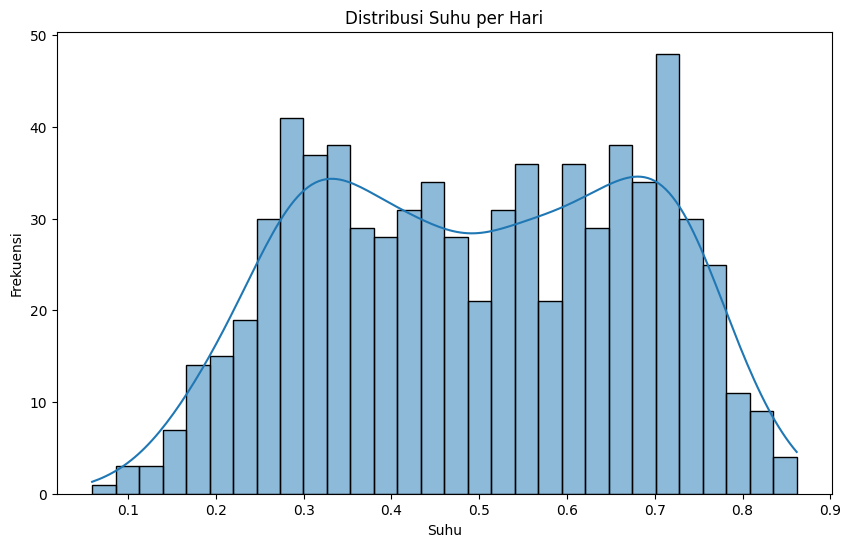

In [11]:
# Visualisasi distribusi suhu per hari
plt.figure(figsize=(10, 6))
sns.histplot(day_data['temp'], kde=True, bins=30)
plt.title('Distribusi Suhu per Hari')
plt.xlabel('Suhu')
plt.ylabel('Frekuensi')
plt.show()

### EDA Bivariate: Menganalisis dua variabel untuk melihat hubungan antar variabel


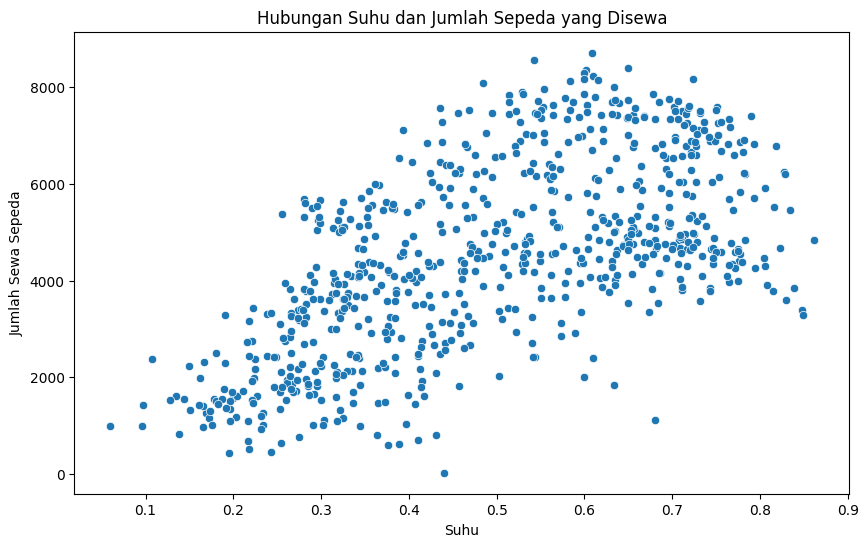

In [12]:
# Visualisasi suhu dan jumlah sewa sepeda per hari
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_data)
plt.title('Hubungan Suhu dan Jumlah Sepeda yang Disewa')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Sewa Sepeda')
plt.show()

### EDA Kategorikal: Menganalisis variabel kategorikal


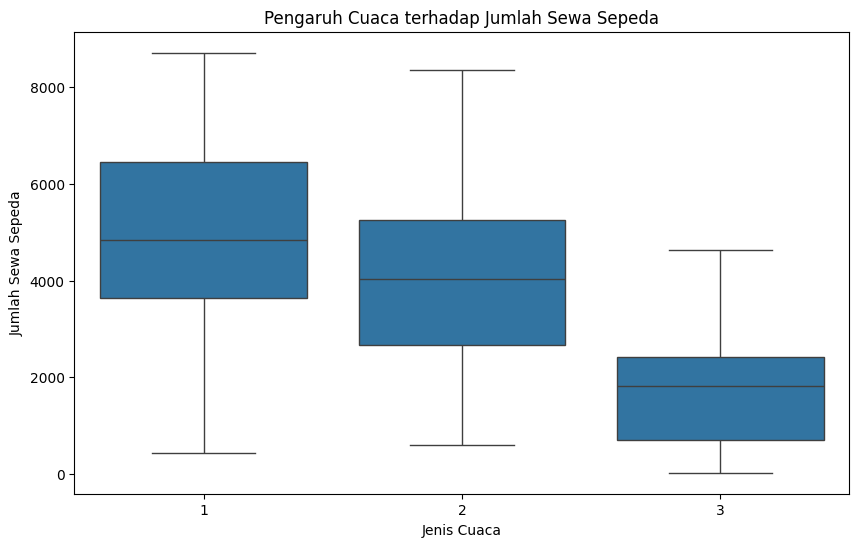

In [13]:
# Visualisasi pengaruh cuaca terhadap jumlah sewa sepeda
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_data)
plt.title('Pengaruh Cuaca terhadap Jumlah Sewa Sepeda')
plt.xlabel('Jenis Cuaca')
plt.ylabel('Jumlah Sewa Sepeda')
plt.show()

### EDA Numerikal: Analisis numerikal

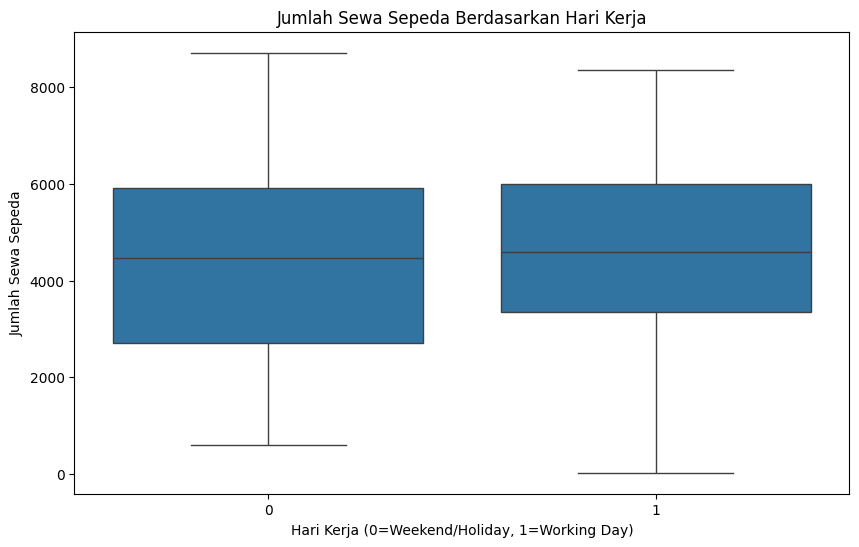

In [14]:
# Visualisasi jumlah sewa sepeda berdasarkan hari kerja
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=day_data)
plt.title('Jumlah Sewa Sepeda Berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja (0=Weekend/Holiday, 1=Working Day)')
plt.ylabel('Jumlah Sewa Sepeda')
plt.show()

**Insight:**
- Hari kerja memiliki jumlah sewa sepeda yang lebih tinggi dibandingkan dengan akhir pekan atau hari libur.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah Cuaca Memengaruhi Jumlah Sewa Sepeda?

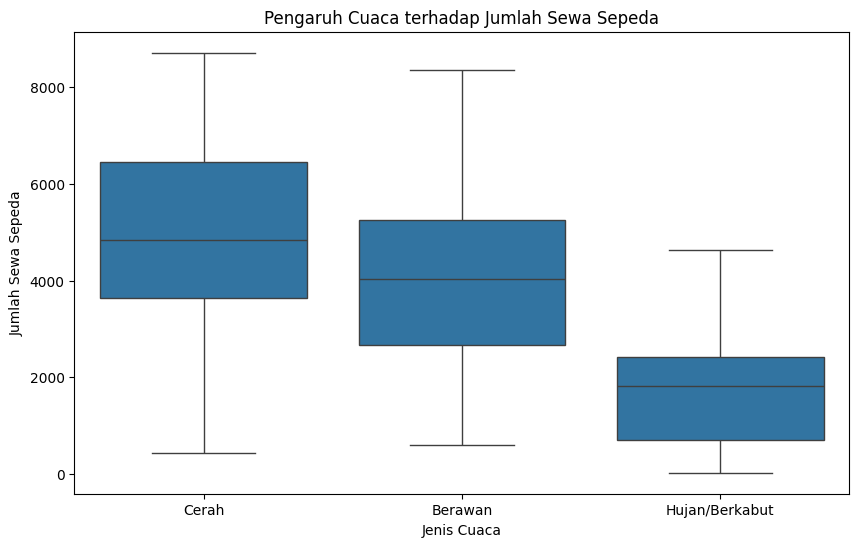

In [18]:
# Visualisasi pengaruh cuaca terhadap jumlah sewa sepeda
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_data)
plt.title('Pengaruh Cuaca terhadap Jumlah Sewa Sepeda')

# Menambahkan label deskriptif untuk jenis cuaca
plt.xlabel('Jenis Cuaca')
plt.ylabel('Jumlah Sewa Sepeda')

# Menambahkan label pada sumbu X
plt.xticks([0, 1, 2], ['Cerah', 'Berawan', 'Hujan/Berkabut'])

plt.show()


### Pertanyaan 2: Apakah Hari Kerja atau Akhir Pekan Berpengaruh terhadap Jumlah Sewa Sepeda?

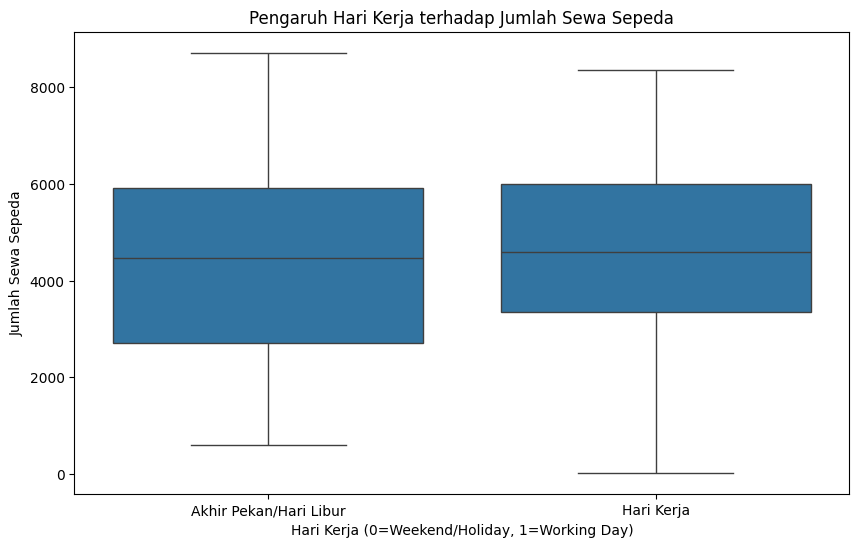

In [19]:
# Visualisasi pengaruh hari kerja terhadap jumlah sewa sepeda
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=day_data)
plt.title('Pengaruh Hari Kerja terhadap Jumlah Sewa Sepeda')

# Menambahkan label deskriptif untuk hari kerja
plt.xlabel('Hari Kerja (0=Weekend/Holiday, 1=Working Day)')
plt.ylabel('Jumlah Sewa Sepeda')

# Menambahkan label pada sumbu X
plt.xticks([0, 1], ['Akhir Pekan/Hari Libur', 'Hari Kerja'])

plt.show()


**Insight:**
- Hari kerja lebih cenderung memiliki tingkat sewa sepeda yang lebih tinggi
- dibandingkan dengan akhir pekan atau hari libur, yang mungkin disebabkan oleh
- kebutuhan transportasi ke tempat kerja.

## Conclusion

- Conclution pertanyaan 1 :
Cuaca memengaruhi jumlah sewa sepeda. Berdasarkan analisis yang dilakukan, kita menemukan bahwa cuaca yang cerah atau sedikit berawan cenderung menghasilkan jumlah sewa sepeda yang lebih tinggi. Hal ini menunjukkan bahwa orang lebih tertarik untuk menyewa sepeda pada hari-hari dengan cuaca yang lebih nyaman, seperti suhu yang moderat dan sedikit kelembapan. Sebaliknya, cuaca buruk seperti hujan atau berkabut mengurangi minat orang untuk menyewa sepeda.

- Conclution pertanyaan 2 :    
Hari kerja berpengaruh pada jumlah sewa sepeda. Analisis menunjukkan bahwa pada hari kerja, jumlah sewa sepeda cenderung lebih tinggi dibandingkan dengan akhir pekan atau hari libur. Hal ini mungkin disebabkan oleh kebutuhan transportasi ke tempat kerja yang lebih tinggi pada hari-hari biasa. Sebaliknya, pada akhir pekan atau hari libur, banyak orang memilih untuk tidak menggunakan sepeda sewaan, yang mungkin karena mereka lebih banyak beraktivitas di rumah atau menggunakan moda transportasi lain.
